In [1]:
import os
from dotenv import load_dotenv
from openai import AzureOpenAI
load_dotenv()
# Some imports for handling images

import base64
from io import BytesIO
from PIL import Image


In [2]:

# Load environment variables
api_key = os.getenv('AZURE_OPENAI_API_KEY')
endpoint = os.getenv('ENDPOINT')
version = os.getenv('VERSION')
deployment = os.getenv('DEPLOYMENT_dalle3')

client = AzureOpenAI(
    azure_endpoint=endpoint, 
    api_key=api_key,
    api_version=version
)

In [3]:
def read_text_file(filepath):
    try:
        with open(filepath, 'r', encoding='utf-8') as file:
            text = file.read()
        return text
    except Exception as e:
        return f"Error reading text file: {e}"

In [8]:
def artist(text):
    image_response = client.images.generate(
            model=deployment,
            prompt=text,
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

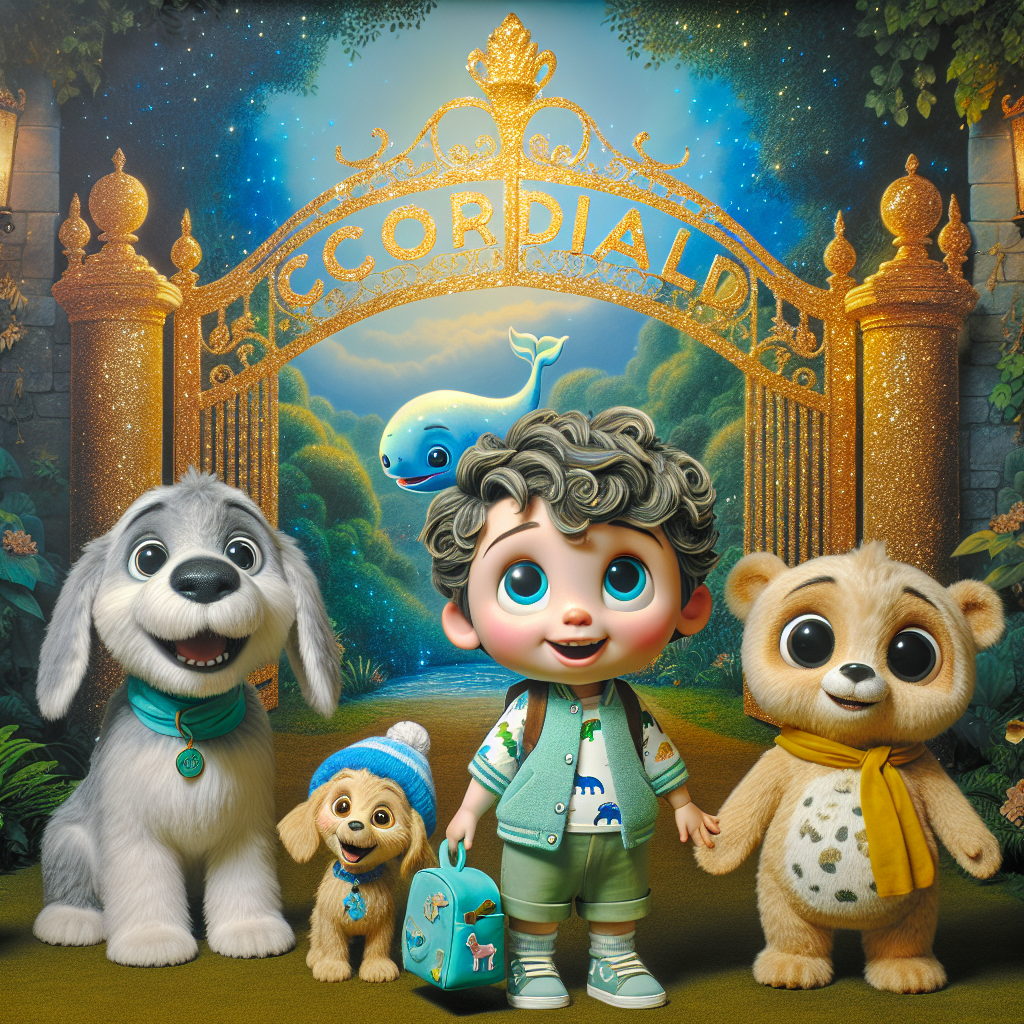

In [12]:
image_path = "image.txt"
image_text = read_text_file(image_path)
image = artist(image_text)
display(image)

In [11]:
image = artist("A beautiful landscape with mountains and a river, in the style of Claude Monet")
image.show()